In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test/Toyota_corolla_2016/2936.jpg
/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test/Toyota_corolla_2016/12334.jpg
/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test/Toyota_corolla_2016/17763.jpg
/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test/Toyota_corolla_2016/415_old.jpg
/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test/Toyota_corolla_2016/272.jpg
/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test/Toyota_corolla_2016/1834.jpg
/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test/Toyota_corolla_2016/8316.jpg
/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test/Toyota_corolla_2016/5656.jpg
/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test/Toyota_corolla_2016/3655.jpg
/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test/Toyota_corolla_2016/16635.jpg
/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test/T

In [3]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [4]:
IMAGE_SIZE = 224
classes = 48

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 3096 images belonging to 48 classes.


In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Daiatsu_Core',
 'Daiatsu_Hijet',
 'Daiatsu_Mira',
 'FAW_V2',
 'FAW_XPV',
 'Honda_BRV',
 'Honda_City_aspire',
 'Honda_Grace',
 'Honda_Vezell',
 'Honda_city_1994',
 'Honda_city_2000',
 'Honda_civic_1994',
 'Honda_civic_2005',
 'Honda_civic_2007',
 'Honda_civic_2015',
 'Honda_civic_2018',
 'KIA_Sportage',
 'Suzuki_Every',
 'Suzuki_Mehran',
 'Suzuki_alto_2007',
 'Suzuki_alto_2019',
 'Suzuki_alto_japan_2010',
 'Suzuki_carry',
 'Suzuki_cultus_2018',
 'Suzuki_cultus_2019',
 'Suzuki_highroof',
 'Suzuki_kyber',
 'Suzuki_liana',
 'Suzuki_margala',
 'Suzuki_swift',
 'Suzuki_wagonR_2015',
 'Toyota HIACE 2000',
 'Toyota_Aqua',
 'Toyota_Hiace_2012',
 'Toyota_Landcruser',
 'Toyota_Passo',
 'Toyota_Prado',
 'Toyota_Vigo',
 'Toyota_Vitz',
 'Toyota_Vitz_2010',
 'Toyota_axio',
 'Toyota_corolla_2000',
 'Toyota_corolla_2007',
 'Toyota_corolla_2011',
 'Toyota_corolla_2016',
 'Toyota_fortuner',
 'Toyota_pirus',
 'Toyota_premio']

In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

test_generator = test_datagen.flow_from_directory(
        '/kaggle/input/car-dataset-new/hj3vvx5946-1/Splited_dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 751 images belonging to 48 classes.


In [8]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg16.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(classes, activation='softmax'))

In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 48)                1204272   
                                                                 
Total params: 15,918,960
Trainable params: 1,204,272
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    batch_size= 32,
    shuffle= True)

Epoch 1/20
97/97 [==============================] - 86s 794ms/step - loss: 3.1141 - accuracy: 0.3349 - val_loss: 2.1623 - val_accuracy: 0.4913
Epoch 2/20
97/97 [==============================] - 62s 635ms/step - loss: 1.4158 - accuracy: 0.6424 - val_loss: 1.6973 - val_accuracy: 0.6072
Epoch 3/20
97/97 [==============================] - 61s 634ms/step - loss: 0.9152 - accuracy: 0.7629 - val_loss: 1.4644 - val_accuracy: 0.6445
Epoch 4/20
97/97 [==============================] - 62s 643ms/step - loss: 0.6417 - accuracy: 0.8269 - val_loss: 1.4752 - val_accuracy: 0.6338
Epoch 5/20
97/97 [==============================] - 61s 628ms/step - loss: 0.4863 - accuracy: 0.8656 - val_loss: 1.0316 - val_accuracy: 0.7310
Epoch 6/20
97/97 [==============================] - 61s 631ms/step - loss: 0.3714 - accuracy: 0.9025 - val_loss: 1.1997 - val_accuracy: 0.6951
Epoch 7/20
97/97 [==============================] - 61s 632ms/step - loss: 0.3359 - accuracy: 0.9050 - val_loss: 1.1072 - val_accuracy: 0.7204

In [15]:
scores = model.evaluate(test_generator)

24/24 [==============================] - 12s 514ms/step - loss: 1.2782 - accuracy: 0.7443


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 20

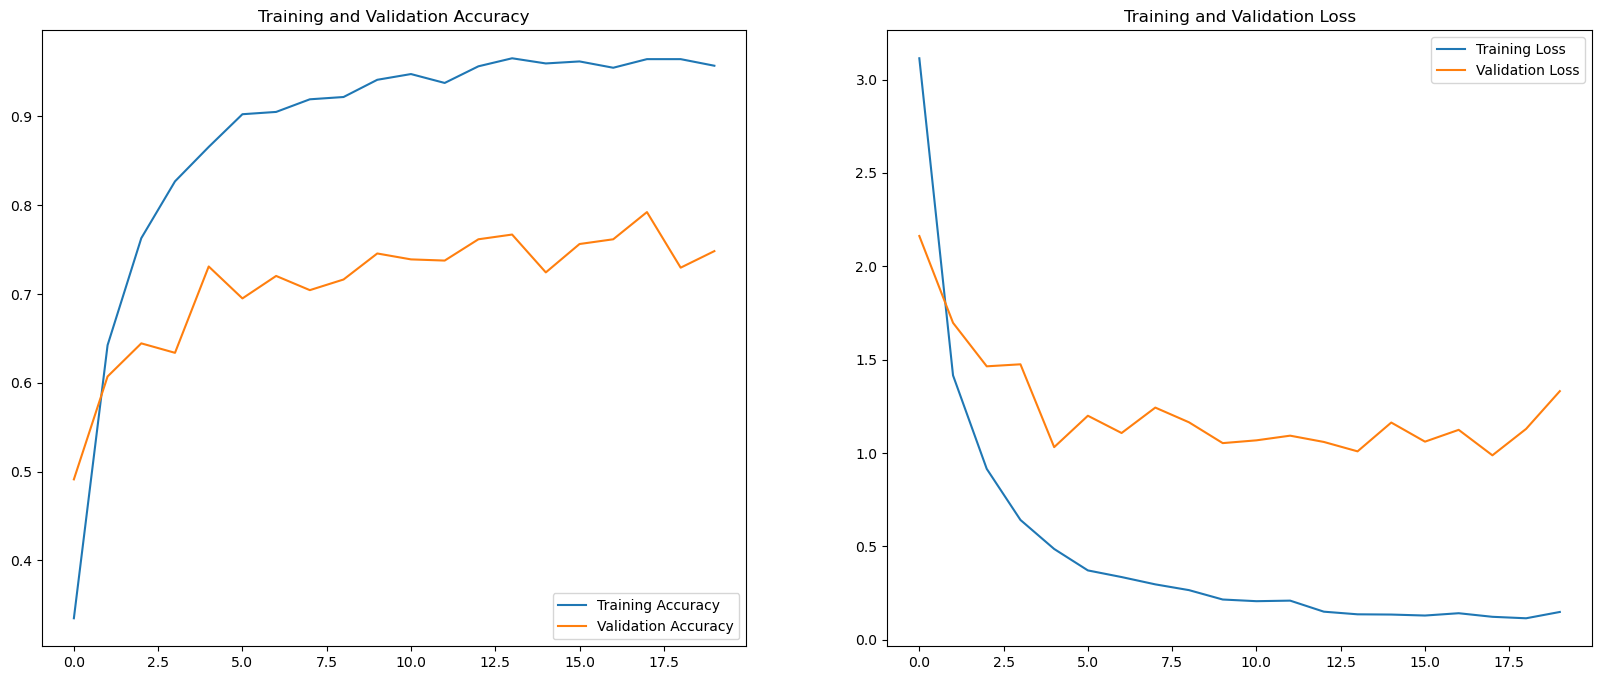

In [18]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


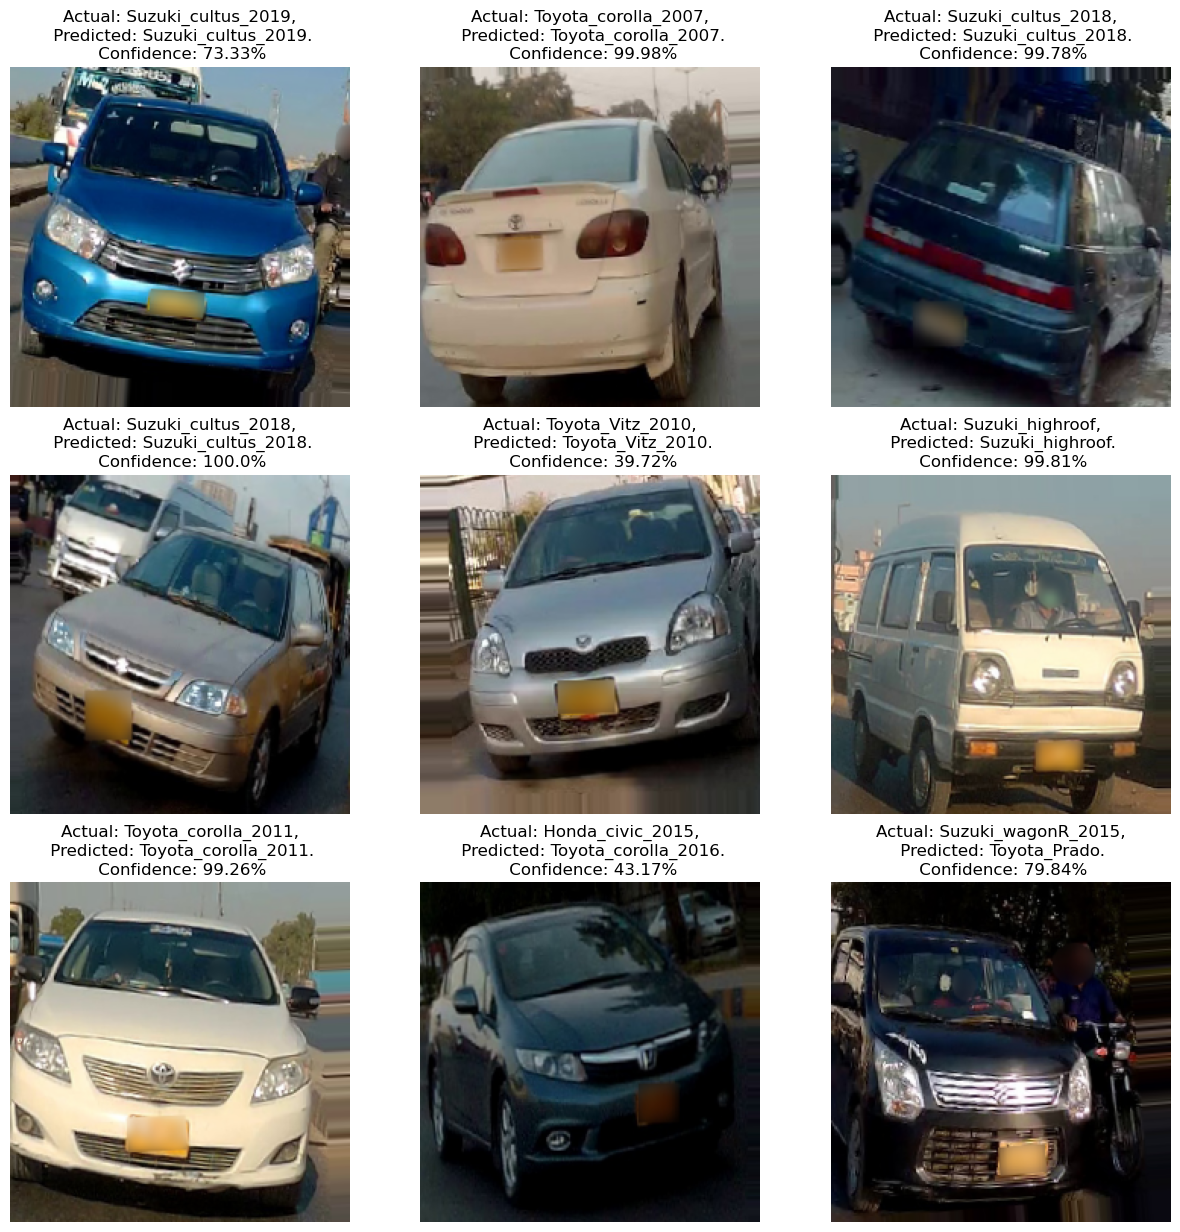

In [20]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break